# Loan prediction problem

This is my very first machine learning project, which objective is to properly classify eligible and non-eligilbe customers in order to automate the loan application process. This particular classification problem is available at: [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/) as a part of their hackathons. As the dataset was rather balanced (the proportion of eligible vs. non-eligible customers was 7:3) accuracy (percentage of cerrectly predicted cases) was the metric used to evaluate the results. After testing a wide range of models, SVC with a polynomial kernel became the method of choice with the final accuracy of 81.82%.

The project is divided into 8 parts:

  1. [Problem statement](#Problem-statement) 
  2. [Hypothesis generation](#Hypothesis-generation)
  3. [Data overview](#Data-overview)
  4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
  5. [Feature engineering](#Feature-engineering)
  6. [Data pre-processing](#Data-pre-processing)
  7. [Training, evaluating and improving the models](#Training,-evaluating-and-improving-the-models)
  8. [Summary](#Summary)

## Problem statement

"Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers."

#### What does this imply in terms of machine learning modeling?

Basically customers can be divided into two groups: those who are eligilble for loan and those who are not. It means that this is a classification problem and that potential models which can be helpful for segmenting loan applications are:

  1. Logistic Regression
  2. K-nearest neighbors
  3. SVM (Support Vector Machine classifier)
  4. Naive Bayes algorithm
  5. Decision tree classifier
  6. Random forest classifier

Apart from that it is worth to develop and evaluate XGBoost and CatBoost classifiers, as examples of ensemble learning algorithms, which has been shown to perform better in some cases in comparison to above mentioned models.

## Hypothesis generation

In this part I listed potential (but not all) factors that can have an impact on the dependent variable:

  1. Customers who are married are more likely to get a loan than those who are single, as their total income is greater
  2. As the number of dependents increases the chance of getting a loan decreases
  3. Graduate customers are more likely to get a loan than those who are undergraduate
  4. Self-employed customers are more likely to get a loan
  5. The higher, the income the more likely it is that the customer will be labeled as eligible
  6. The greater the sum of applicant and coapplicant income is, the greater the chance of getting a loan
  7. The longer the term of loan is, the more likely is that the loan will be given
  8. Customers with negative credit history are much more less likely to get a loan
  9. Customers in rular areas might be less likely to get a loan in comparison to customers from urban and semi-urban areas
  
## Data overview

The dataset for this practice problem was provided by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement). Under the previous link there can be found a train file (which will be used in the following analysis&model development) and a test file for the hackathon submission.

In order to evaluate the results of potential models I will split the train file into training set and test set. The test file will be unused, as I do not submit my final model in the hackathon contest.

The variables present in the train file are shown below:

|No | Variable |	Description |
| :- | :- | :- |
|1| Loan_ID |	Unique Loan ID |
|2| Gender |	Male/ Female |
|3| Married |	Applicant married (Y/N) |
|4| Dependents |	Number of dependents |
|5| Education |	Applicant Education (Graduate/ Under Graduate) |
|6| Self_Employed |	Self employed (Y/N) |
|7| ApplicantIncome |	Applicant income |
|8| CoapplicantIncome |	Coapplicant income |
|9| LoanAmount |	Loan amount in thousands |
|10| Loan_Amount_Term |	Term of loan in months |
|11| Credit_History |	credit history meets guidelines |
|12| Property_Area |	Urban/ Semi Urban/ Rural |
|13| Loan_Status |	(Target) Loan approved (Y/N)|

## Exploratory Data Analysis (EDA)

In this part I will explore the dataset in order to better understand above listed features of our customers. I will start with descriptive statistics and some visualisation techniques.

In [673]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')

#Importing the dataset
dataset = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 20)
np.set_printoptions(threshold = sys.maxsize)
print('Dataset shape: {}\n'.format( dataset.shape))


Dataset shape: (614, 13)



In [674]:
#Looking at the first rows of our dataset
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [675]:
#Looking at diffrent data types of our variables
print('Data types:\n', dataset.dtypes)

Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [676]:
print('Unique values:\n', dataset.apply(lambda x: len(x.unique())))

Unique values:
 Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64


**Note:**
As we can see our dataset contains 614 rows and 14 columns of which one is our target varaible (Loan_Status) and one is the uniqe Loan ID.

The variables are either of type 'object' (categorical variables), 'int64' (integer variables) or 'float64' (variables with decimal values). Let's explore those categorical and numerical variables one by one.

## Univariate analysis

### Numerical variables

In [677]:
#Descriptive statistics
print('Descriptive statistics:\n', dataset.describe(), '\n')

Descriptive statistics:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000   



In [678]:
#skewness&kurtosis of numerical variables without 'Credit_History'
from scipy.stats import skew, kurtosis
numerical_columns = [x for x in dataset.dtypes.index
                     if dataset.dtypes[x] != 'object']
numerical_columns = [x for x in numerical_columns
                     if x not in ['Loan_Amount_Term', 'Credit_History']]

for column in numerical_columns:
    print('Variable {}'.format(column))
    print('Skewness: {}'.format(dataset[column].skew().round(2)))
    print('Kurtosis: {}\n'.format(dataset[column].kurtosis().round(2)))

Variable ApplicantIncome
Skewness: 6.54
Kurtosis: 60.54

Variable CoapplicantIncome
Skewness: 7.49
Kurtosis: 84.96

Variable LoanAmount
Skewness: 2.68
Kurtosis: 10.4



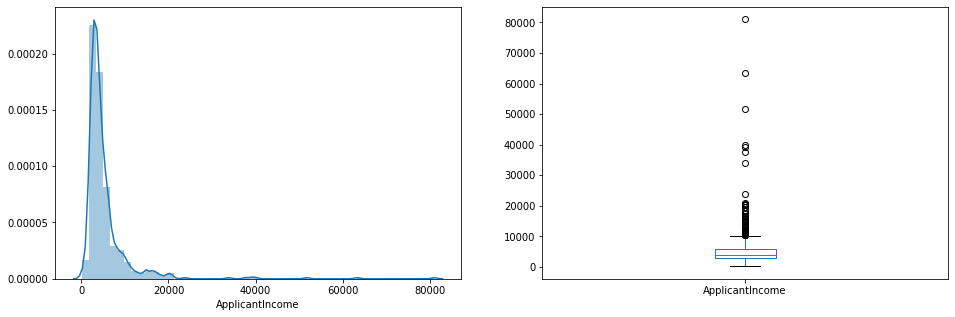

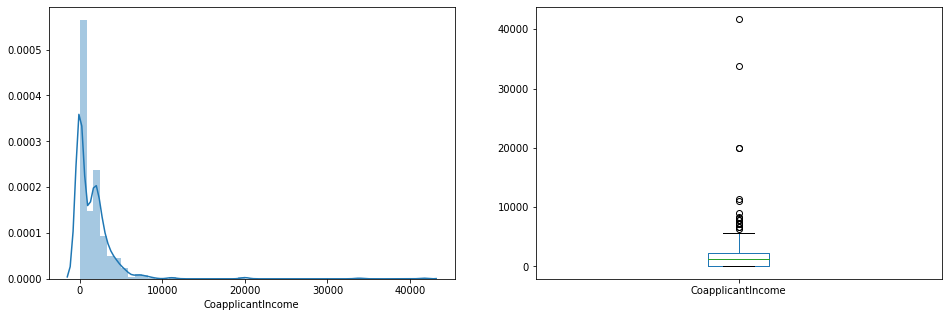

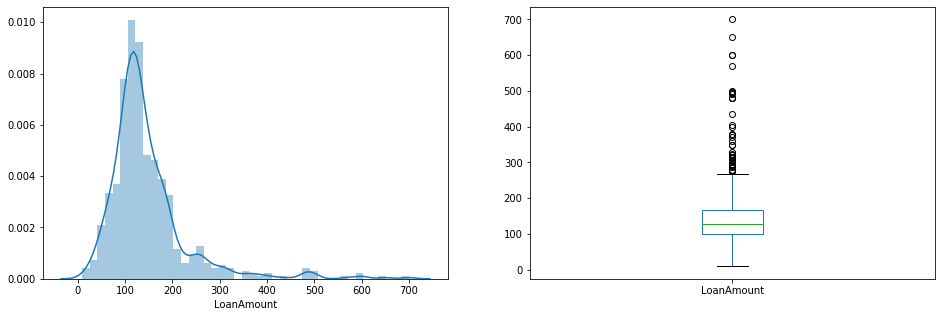

In [679]:
#Plotting numerical variables without Loan_Amount_Term and Credit_History
for variable in numerical_columns:
    plt.subplot(121)
    sns.distplot(dataset[variable]);
    plt.subplot(122)
    dataset[variable].plot.box(figsize = (16, 5))
    plt.show()
        

**Note:**
Descriptive statistics indicated, that the variables 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount' are not normaly distributed and are right-skewed (mean greater than median), which was confirmed by skewness and kurtosis calculations along with density plots. As shown in the boxplots there is a significant amount of outliers in each variable. It may be reasonable to transform those variables at some point using natural logarithm.

Furthermore descriptive statistics of LoanAmountTerm indicated that at least 50% loans were given for 360 days. It may be reasonable to treat this variable as a categorical one as there are only 11 unique variables (see the last code cell before 'Univariate analysis' section).

Although 'Credit_History' is more of a categorical variable it was useful to derive those descriptive statistics in order to count the percentage of customers with positive credit history (84%).

Different 'count' statistic indicates missing values problem.

### Categorical variables

In [680]:
#Frequency of categories for categorical variables (in %)
categorical_columns = [x for x in dataset.dtypes.index 
                       if dataset.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns
                       if x not in ['Loan_ID', 'source']]
categorical_columns = categorical_columns + ['Loan_Amount_Term', 'Credit_History']

for column in categorical_columns:
    print("\nFrequency of Categories for variable {}".format(column))
    print (dataset[column].value_counts(normalize = True).round(3)*100)


Frequency of Categories for variable Gender
Male      81.4
Female    18.6
Name: Gender, dtype: float64

Frequency of Categories for variable Married
Yes    65.1
No     34.9
Name: Married, dtype: float64

Frequency of Categories for variable Dependents
0     57.6
1     17.0
2     16.9
3+     8.5
Name: Dependents, dtype: float64

Frequency of Categories for variable Education
Graduate        78.2
Not Graduate    21.8
Name: Education, dtype: float64

Frequency of Categories for variable Self_Employed
No     85.9
Yes    14.1
Name: Self_Employed, dtype: float64

Frequency of Categories for variable Property_Area
Semiurban    37.9
Urban        32.9
Rural        29.2
Name: Property_Area, dtype: float64

Frequency of Categories for variable Loan_Status
Y    68.7
N    31.3
Name: Loan_Status, dtype: float64

Frequency of Categories for variable Loan_Amount_Term
360.0    85.3
180.0     7.3
480.0     2.5
300.0     2.2
84.0      0.7
240.0     0.7
120.0     0.5
36.0      0.3
60.0      0.3
12.0     

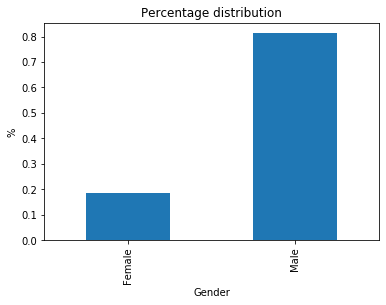

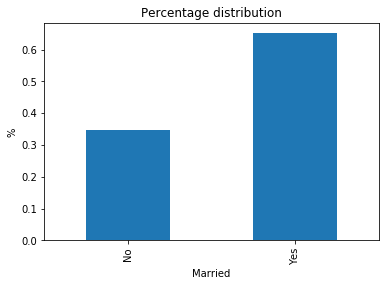

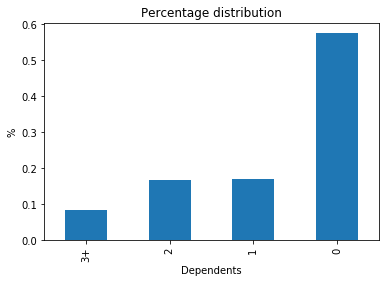

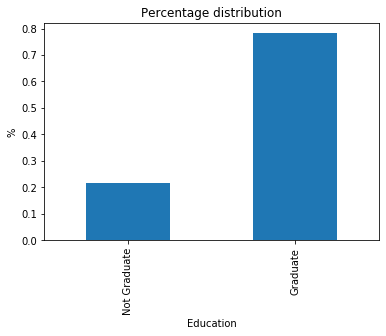

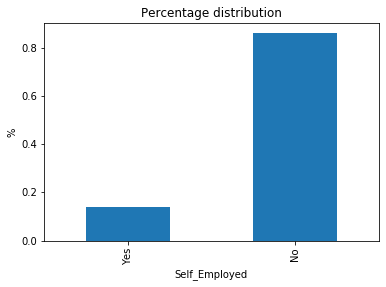

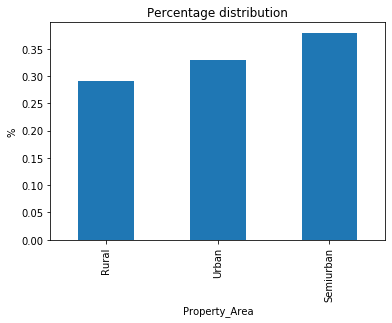

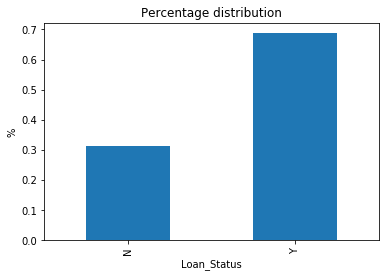

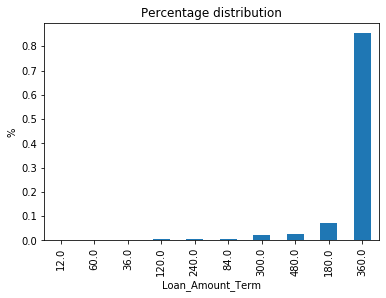

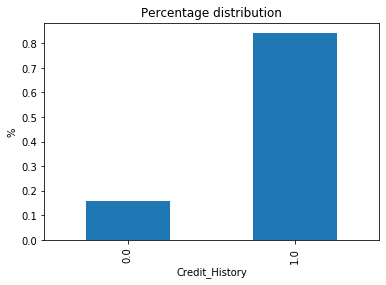

In [681]:
#Plotting categorical and ordinal variables 
for variable in categorical_columns:
    dataset[variable].value_counts(normalize = True, ascending = True).plot.bar()
    plt.xlabel(variable)
    plt.ylabel('%')
    plt.title('Percentage distribution')
    plt.show()

**Note:**
Frequencies of categorical variables exhibitet, that:
1. Over 80% of our customers are males
2. Over 60% are married
3. Almost 58% have no dependents, but 8.5% have at least 3 of them
4. Around 78% are graduates
5. Nearly 14% are self-employed
6. Semi-urban area dominates over urban and rular areas (but not strongly)
7. Almost 70% of loan applications were considered positvely
8. As it turned out over 85% of loans were given for a 360 days term. Other loan terms are almost marginal.
9. There are more or less 84% of customers with positive credit history (we saw it early by examining numerical variables)

## Bivariate analysis

In this section I will examine the interconections between the dependent variable and the independent variables.

### Categorical variables vs. Loan_Status


 Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339 



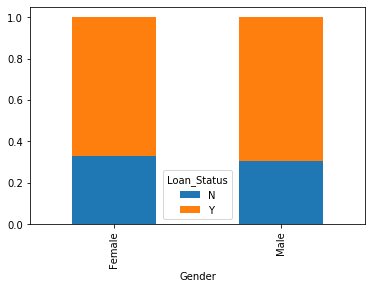


 Loan_Status    N    Y
Married              
No            79  134
Yes          113  285 



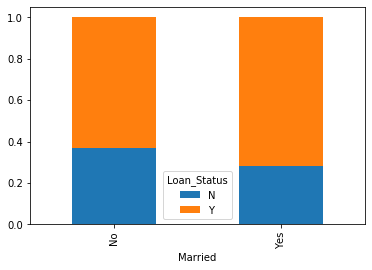


 Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33 



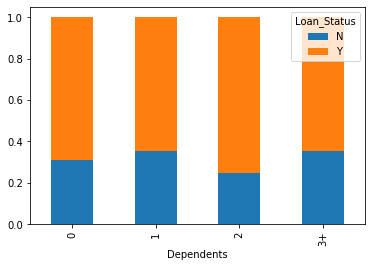


 Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82 



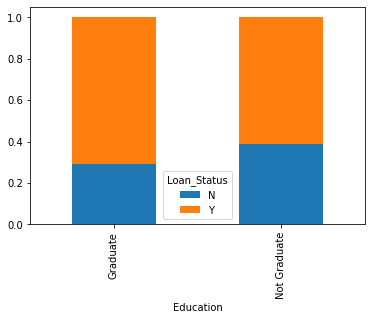


 Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56 



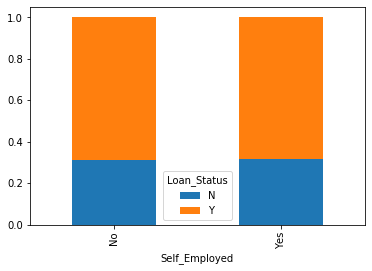


 Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133 



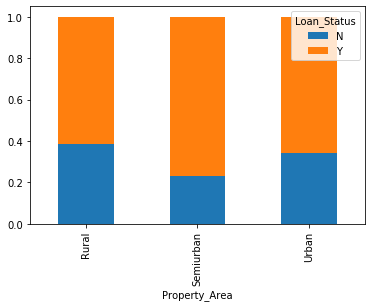


 Loan_Status         N    Y
Loan_Amount_Term          
12.0                0    1
36.0                2    0
60.0                0    2
84.0                1    3
120.0               0    3
180.0              15   29
240.0               1    3
300.0               5    8
360.0             153  359
480.0               9    6 



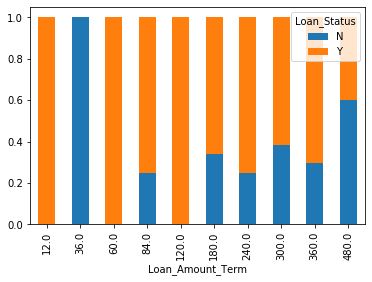


 Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378 



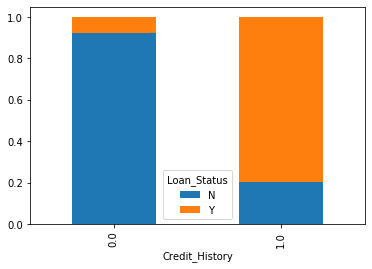

In [682]:
for variable in categorical_columns:
    if variable not in ['Loan_Status']:
        cross = pd.crosstab(index = dataset[variable], 
                        columns = dataset['Loan_Status'])
        print('\n', cross, '\n')
        cross.div(cross.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
        plt.show()
    
    

**Note:**
After this part of bivariate analysis we can state that:
1. Gender does not affect the decission for loan application
2. There is a slight higher proportion of loan admission for customers that are married. To confirm that this difference is statistically significant we will conduct a Chi-square test.
3. The number of dependents does not exhibit any pattern on its own. Maybe it is a good idea to combine this variable with 'ApplicantIncome' or with later created 'TotalIncome' variable, which will be the sum of 'ApplicantIncome' and 'CoapplicantIncome'
4. Graduates are more likely to get a loan in comparison to not graduates, but we have to check if this difference is statistically significant with a Chi-square test.
5. There is no significant difference in proportion of admitted loans between those who are self-employed and those who are not.
6. Semi-urban area has the lowest and the rular area has the largest percentage of denied loan applications
7. 'Loan_Amount_Term' variable does not exibit any significant information as tehre are too few samples of loans given for shorter amount of time than 360 days (excluding those loans given for 180 days).
8. There are very few customers who got their loan despite of negative credit history, but there are quite a few customers with positive credit history who didn't get teir loan. It seems like 'Credit_History' is the driving variable in determining eligibility of customers.

In [683]:
#Chi square tests for 'Married' and 'Graduate' variables
from scipy.stats import chi2_contingency

#Married
cross = pd.crosstab(index = dataset['Married'], 
                        columns = dataset['Loan_Status'])
print(chi2_contingency(cross))

#Eduaction
cross = pd.crosstab(index = dataset['Education'], 
                        columns = dataset['Loan_Status'])
print(chi2_contingency(cross))

(4.475019348315097, 0.03439381301579988, 1, array([[ 66.93289689, 146.06710311],
       [125.06710311, 272.93289689]]))
(4.091490413303621, 0.04309962129357355, 1, array([[150.09771987, 329.90228013],
       [ 41.90228013,  92.09771987]]))


**Note:**
The first value is the test statistic, the scond one is the *p-value* and the array shows the expected count for each group.
The differences in maritial status and education are statistically significant (*p-value*<0.05) and therefore they have an impact on the dependent variable.

### Numerical variables vs. Loan_Status

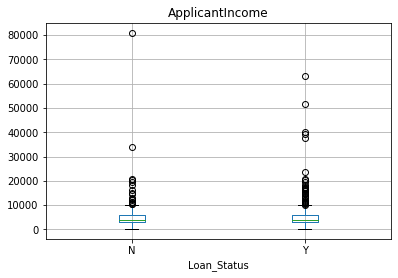

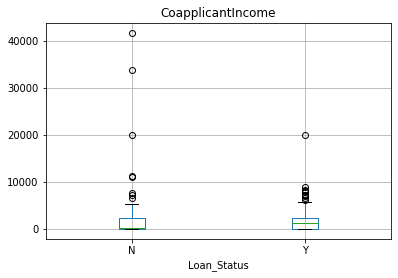

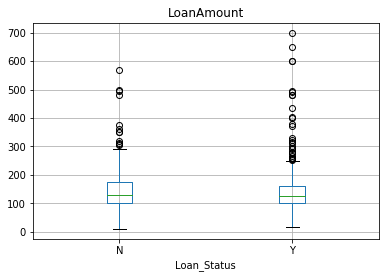

In [684]:
for variable in numerical_columns:
    dataset.boxplot(column = variable, by = 'Loan_Status')
    plt.suptitle('')

**Note:**
From the above boxplots we can derive a conclusion that:
1. It seems that applicant income does not have any impact on 'Loan_Status' (range, median, IQR are simillar)
2. Outliers are present in all three numerical variables

It may be usefull to create bins for all three variables and see how the level of those variables affects the dependent variable.

Loan_Status   N    Y
AppIncBins          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


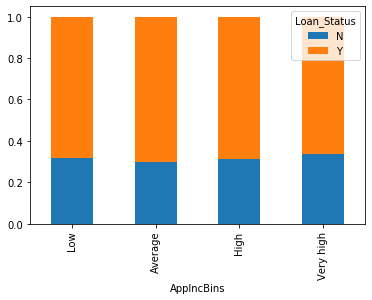

Loan_Status    N    Y
CoappIncBins         
Low            3   19
Average       61  161
High          32   65


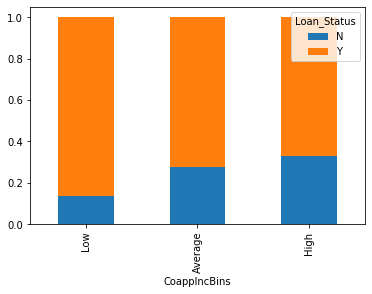

Loan_Status       N    Y
LoanAmountBins          
Low              47  107
Average         103  255
High             31   49


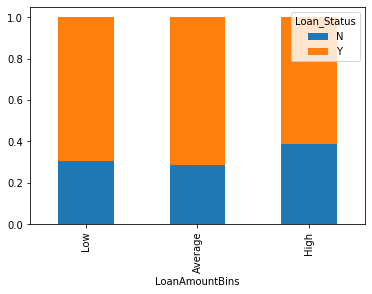

In [685]:
#Creating bins for all three numerical variables

#ApplicantIncome
bins = [0, 2500, 4000, 6000, 81000]
levels = ['Low', 'Average', 'High', 'Very high']
dataset['AppIncBins'] = pd.cut(dataset['ApplicantIncome'], bins, labels=levels)

print(pd.crosstab(index = dataset['AppIncBins'], 
                  columns = dataset['Loan_Status']))

cross = pd.crosstab(index = dataset['AppIncBins'], 
                            columns = dataset['Loan_Status'])
cross.div(cross.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

#CoapplicantIncome
bins = [0, 1000, 3000, 42000]
levels = ['Low', 'Average', 'High']
dataset['CoappIncBins'] = pd.cut(dataset['CoapplicantIncome'], bins, labels=levels)

print(pd.crosstab(index = dataset['CoappIncBins'], 
                  columns = dataset['Loan_Status']))

cross = pd.crosstab(dataset['CoappIncBins'], dataset['Loan_Status'])
cross.div(cross.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


#LoanAmount
bins = [0, 100, 200, 700]
levels = ['Low', 'Average', 'High']
dataset['LoanAmountBins'] = pd.cut(dataset['LoanAmount'],bins,labels=levels)

print(pd.crosstab(index = dataset['LoanAmountBins'], 
                  columns = dataset['Loan_Status']))

cross = pd.crosstab(dataset['LoanAmountBins'], dataset['Loan_Status'])
cross.div(cross.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


**Note:**
Above created figures confirm that:
1. 'ApplicantIncome' does not have any impact on 'LoanStatus'
2. If 'CoapplicantIncome' is equal to 0 there is a higher chance of getting a loan, which at first sight is a little bit counterintuitive, but we should bear in mind that most of customers does not have any coapplicant. Therefore it may be useful to create a 'TotalIncome' variable in further stages.
3. If 'LoanAmount' variable is higher the chance of getting a loan is smaller.

## Feature engineering

In this section I will create two additional variables based on the already existing ones, perform univariate and bivariate analysis of those newly created features, as well as summarize which hypothesis were confirmed and which were rejected during this and previous section.

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: TotalIncome, dtype: float64


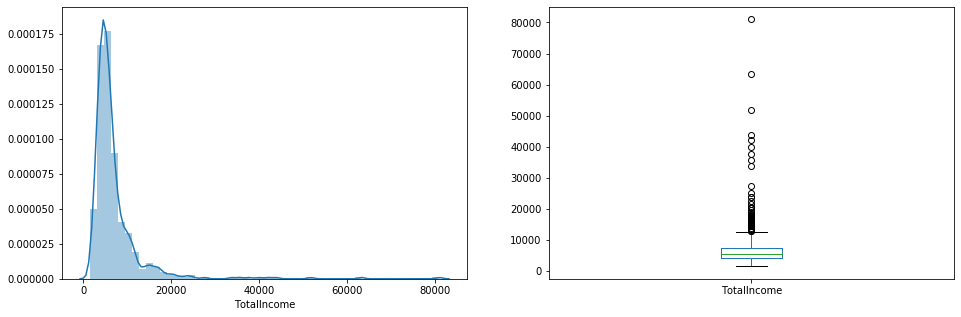

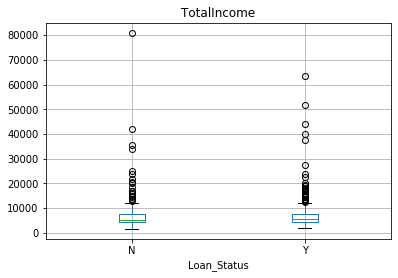

Loan_Status     N    Y
TotalIncBins          
Low            34   50
Average       101  254
High           28   60
Very high      29   58


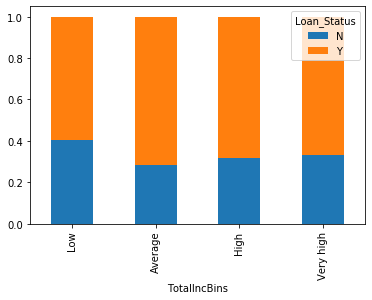

In [686]:
#Creating a 'TotalIncome' variable
dataset['TotalIncome'] = dataset['ApplicantIncome']+dataset['CoapplicantIncome']

#Univariate analysis
print(dataset['TotalIncome'].describe())

plt.subplot(121)
sns.distplot(dataset['TotalIncome']);
plt.subplot(122)
dataset['TotalIncome'].plot.box(figsize = (16, 5))
plt.show()

#Bivariate analysis
dataset.boxplot(column = 'TotalIncome', by = 'Loan_Status')
plt.suptitle('')
plt.show()

#Bins for TotalIncome
bins = [0, 3500, 7000, 10000, 81000]
levels = ['Low', 'Average', 'High', 'Very high']
dataset['TotalIncBins'] = pd.cut(dataset['TotalIncome'], bins, labels=levels)

print(pd.crosstab(index = dataset['TotalIncBins'], 
                  columns = dataset['Loan_Status']))

cross = pd.crosstab(index = dataset['TotalIncBins'], 
                            columns = dataset['Loan_Status'])
cross.div(cross.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

**Note:**
1. From the univariate analysis we can see, that the 'TotalIncome' variable is not normally distributed and it has many outliers which is not surprising, as this variable was created from two not-normally distributed variables with significant amount of outliers.
2. Bivariate analysis indicated, that the lower the 'TotalIncome' variable is the lower the chance for getting a loan. Customers with high and very high 'TotalIncome' are a little bit less likely to get a loan in comparison to those with average 'TotalIncome'. This may be caused by factors other than 'TotalIncome' (e.g. Credit_History).

All in all 'TotalIncome' is a useful variable and It will be kept for the modeling part.

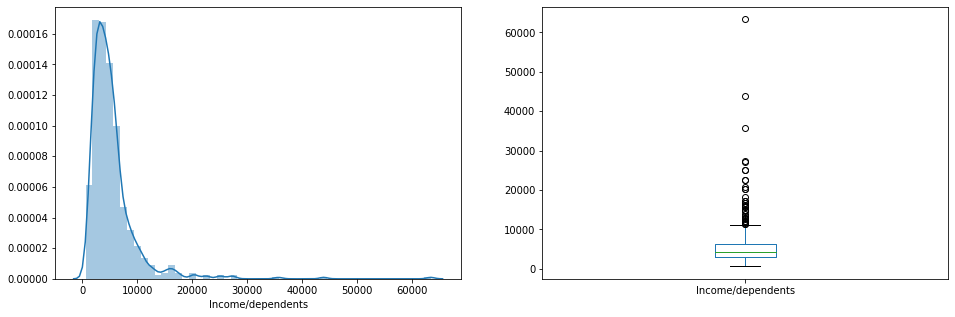

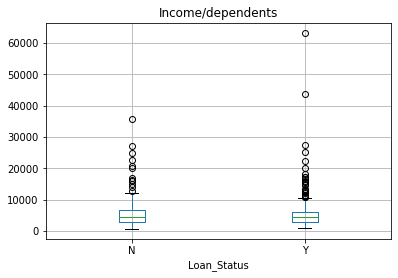

Loan_Status       N    Y
TotalIncDepBins         
Low              41   68
Average          43  111
High             41  128
Very high        61  106


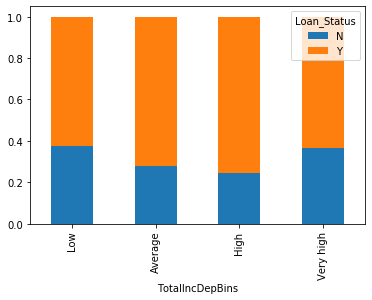

In [687]:
#'Income/dependents' variable

#Replacing strings in 'Dependents' variable to make it numeric
dataset['Dependents'].replace(['0', '1', '2', '3+'], [1, 1.5, 2, 3], inplace = True)

#Creating a 'Income/dependents' variable
dataset['Income/dependents'] = dataset['TotalIncome']/dataset['Dependents']

#Univariate analysis
plt.subplot(121)
sns.distplot(dataset['Income/dependents']);
plt.subplot(122)
dataset['Income/dependents'].plot.box(figsize = (16, 5))
plt.show()

#Bivariate analysis
dataset.boxplot(column = 'Income/dependents', by = 'Loan_Status')
plt.suptitle('')
plt.show()

#Bins for Income/dependents
bins = [0, 2500, 4000, 6000, 81000]
levels = ['Low', 'Average', 'High', 'Very high']
dataset['TotalIncDepBins'] = pd.cut(dataset['Income/dependents'], bins, labels=levels)

print(pd.crosstab(index = dataset['TotalIncDepBins'], 
                  columns = dataset['Loan_Status']))

cross = pd.crosstab(index = dataset['TotalIncDepBins'], 
                            columns = dataset['Loan_Status'])
cross.div(cross.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

**Note:**

Because of a significant amount of customers without any dependents I made a decision not to scale their 'TotalIncome' by any number (that's why I replaced 0 dependents with 1 dependent), but it felt right to 'penalize' those customers who do have one dependent, therefore I replaced 1 dependent with a 1.5 scaling factor. Because there was a marginal amount of '3+' dpendents I decided to 'penalize' those customers with a factor o 3.

As the univariate analysis has shown Income/dependents variable is not normally distributed and has significant amount of outliers. 

Apart from that bivariate analysis has shown that the amount of income per dependent has some impact on the target variable, especially when the ratio is low. For a very high income/dependent value there may be some other decisive factors which caused such high denial of loan applications.

I think it is reasonable to keep this variable for the modeling stage.

### Hypothesis validation

After performing univariate and bivariate analysis of present as well as newly created features and some statistical testing we are ready to summarize which of our hypothesis listed at the beginning were confirmed (<input type="checkbox" disabled checked>) and which were rejected (<input type="checkbox" disabled>).

|No | Hypothesis |	Decision | Stage of analysis |
| :-: | :- | :-: |:-:|
|1| Customers who are married are more likely to get a loan than those who are single, as their total income is probably greater |<input type="checkbox" disabled checked> | Bivariate |
|2|	As the number of dependents increases the chance of getting a loan decreases | <input type="checkbox" disabled>|Bivariate |
|3|	Graduate customers are more likely to get loan than those who are undergraduate| <input type="checkbox" disabled checked>|Bivariate |
|4|	Self-employed customers are more likely to get a loan |<input type="checkbox" disabled>|Bivariate |
|5|	The higher the income the more likely it is that the customer will be labeled as eligible| <input type="checkbox" disabled>|Bivariate |
|6|	The greater the sum of applicant and coapplicant income is, the greater the chance of getting a loan |<input type="checkbox" disabled> |Feature engineering |
|7|	The longer the term of loan is, the more likely is that the loan will be given |<input type="checkbox" disabled>|Bivariate |
|8|	Customers with negative credit history are much more less likely to get a loan |<input type="checkbox" disabled checked>|Bivariate |
|9|	Customers in rular areas might be less likely to get a loan in comparison to customers from urban and semi-urban areas|<input type="checkbox" disabled>|Bivariate |


We validated three out of nine initial hypothesis. 

### Corelation matrix

After the stage of feature engineering it is time to create a correlation matrix which will show the interconections between all our numerical variables (those already present and newly created).

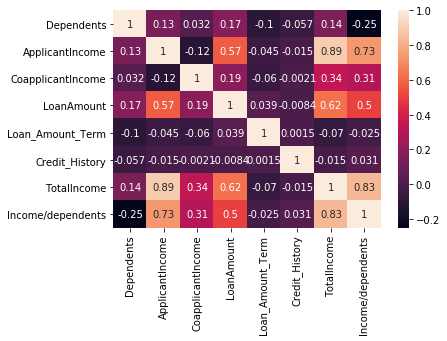

In [688]:
corrMatrix = dataset.corr()
plt.figure()
sns.heatmap(corrMatrix, annot=True)

**Note:**

Above created correlation matrix indicates that there is a moderate correlation between 'ApplicantIncome' and 'LoanAmount', as well as between 'TotalIncome' and 'LoanAmount' which is not surprising, because the 'ApplicantIncome' is a component of the 'TotalIncome' variable.

Correlations between newly created variables and their components shouldn't rivet our attention.

## Data pre-processing

### Missing values treatment

In this section I will impute missing data for those variables who have missing values. But before doing that first of all I will drop variables I used to do binning and split the data into training set and test set in order to avoid 'information leakage'.

In [689]:
#Dropping binning variables
dataset = dataset.drop(['AppIncBins', 'CoappIncBins', 'LoanAmountBins', 'TotalIncBins', 'TotalIncDepBins'], axis=1)

In [690]:
#Creating training and test set

#Creating matrix of features and a vector with dependent variable
X = dataset.drop(['Loan_ID', 'Loan_Status'], 1)
y = dataset['Loan_Status'].map(dict(Y=1, N=0))

#Dividing the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [691]:
#Determining variables with missing values
print('\nMissing values in the training matrix of features:\n', X_train.apply(lambda x: sum(x.isnull())))
print('\nMissing values in the training dependent variable vector:\n', sum(y_train.isnull()))
print('\nMissing values in the test matrix of features:\n', X_test.apply(lambda x: sum(x.isnull())))
print('\nMissing values in the test dependent variable vector:\n', sum(y_test.isnull()))


Missing values in the training matrix of features:
 Gender               12
Married               3
Dependents           10
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     11
Credit_History       33
Property_Area         0
TotalIncome           0
Income/dependents    10
dtype: int64

Missing values in the training dependent variable vector:
 0

Missing values in the test matrix of features:
 Gender                1
Married               0
Dependents            5
Education             0
Self_Employed         7
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            7
Loan_Amount_Term      3
Credit_History       17
Property_Area         0
TotalIncome           0
Income/dependents     5
dtype: int64

Missing values in the test dependent variable vector:
 0


In [692]:
#Filling na's with mode for categorical variables for the training set
for variable in categorical_columns:
       if variable not in ['Loan_Status']:
        X_train[variable].fillna(X_train[variable].mode() [0], inplace = True)

#Checking the results
print('\nMissing values in the training set:\n', X_train.apply(lambda x: sum(x.isnull())))


Missing values:
 Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
TotalIncome           0
Income/dependents    10
dtype: int64


In [693]:
#Filling na's with mode for categorical variables from the training set into the test set
for variable in categorical_columns:
       if variable not in ['Loan_Status']:
        X_test[variable].fillna(X_train[variable].mode() [0], inplace = True)

#Checking the results
print('\nMissing values in the test set:\n', X_test.apply(lambda x: sum(x.isnull())))


Missing values:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           7
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
Income/dependents    5
dtype: int64


In [694]:
#Filling na's with median for numerical variables in the training set
X_train['LoanAmount'].fillna(X_train['LoanAmount'].median(), inplace = True)
X_train['Income/dependents'].fillna(X_train['Income/dependents'].median(), inplace = True)

#Checking the results
print('\nMissing values in the training set:\n', X_train.apply(lambda x: sum(x.isnull())))

#Filling na's with median for numerical variables from the training set into the test set
X_test['LoanAmount'].fillna(X_train['LoanAmount'].median(), inplace = True)
X_test['Income/dependents'].fillna(X_train['Income/dependents'].median(), inplace = True)

#Checking the results
print('\nMissing values in the test set:\n', X_test.apply(lambda x: sum(x.isnull())))


Missing values:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
Income/dependents    0
dtype: int64

Missing values:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
Income/dependents    0
dtype: int64


**Note:**

For categorical variables I chose imputation using mode as there are very few missing values and for numerical variables I chose imputation using median as the distribution was skewed and some outliers were present.

## Outlier treatment

In this section I will use the natural logarithim in order to get rid of outliers present in the numerical variables.

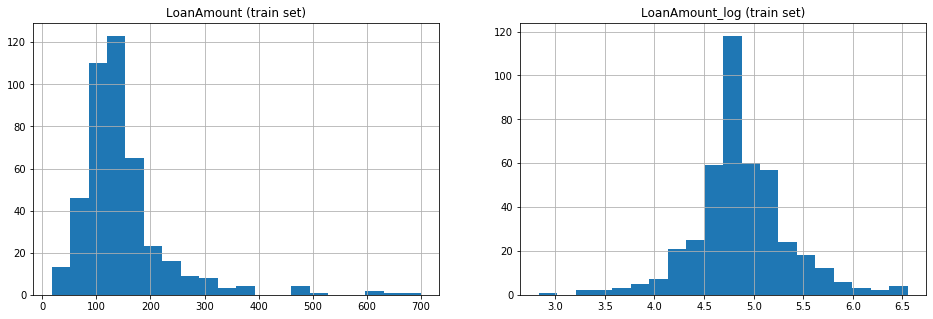

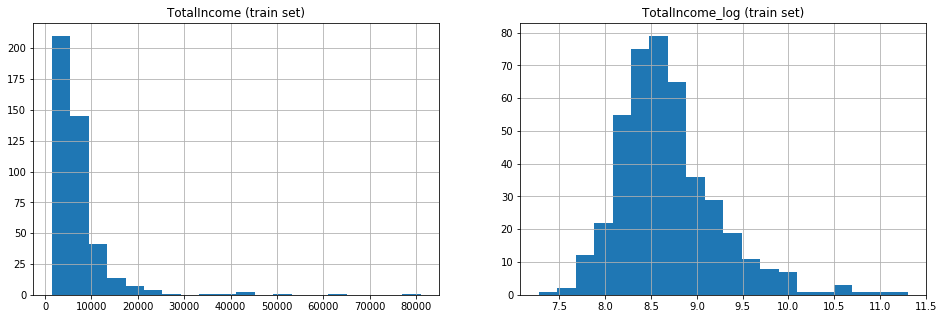

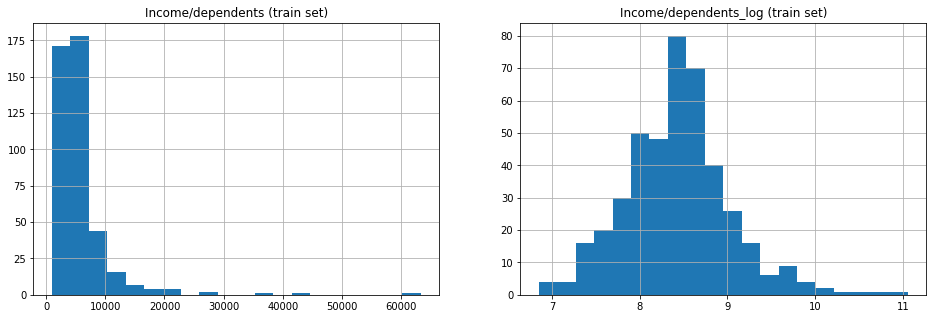

In [695]:
#Training set

#Loan Amount
X_train['LoanAmount_log'] = np.log(X_train['LoanAmount'])
plt.subplot(121)
X_train['LoanAmount'].hist(bins = 20)
plt.title('LoanAmount (train set)')
plt.subplot(122)
X_train['LoanAmount_log'].hist(bins = 20, figsize = (16, 5))
plt.title('LoanAmount_log (train set)')
plt.show()

#Total Income
X_train['TotalIncome_log'] = np.log(X_train['TotalIncome'])
plt.subplot(121)
X_train['TotalIncome'].hist(bins = 20)
plt.title('TotalIncome (train set)')
plt.subplot(122)
X_train['TotalIncome_log'].hist(bins = 20, figsize = (16, 5))
plt.title('TotalIncome_log (train set)')
plt.show()

#Income/dependents
X_train['Income/dependents_log'] = np.log(X_train['Income/dependents'])
plt.subplot(121)
X_train['Income/dependents'].hist(bins = 20)
plt.title('Income/dependents (train set)')
plt.subplot(122)
X_train['Income/dependents_log'].hist(bins = 20, figsize = (16, 5))
plt.title('Income/dependents_log (train set)')
plt.show()

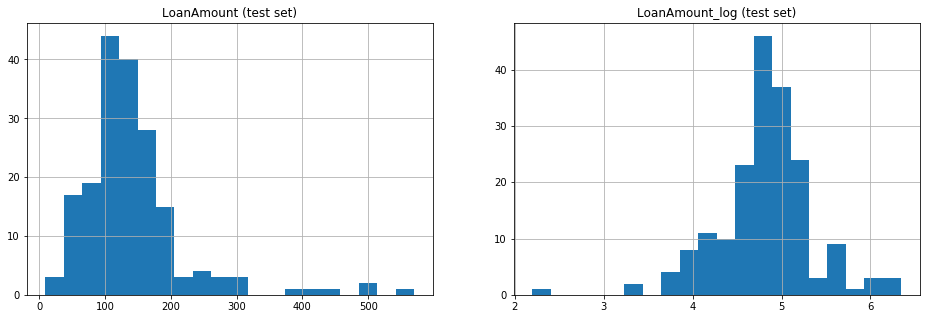

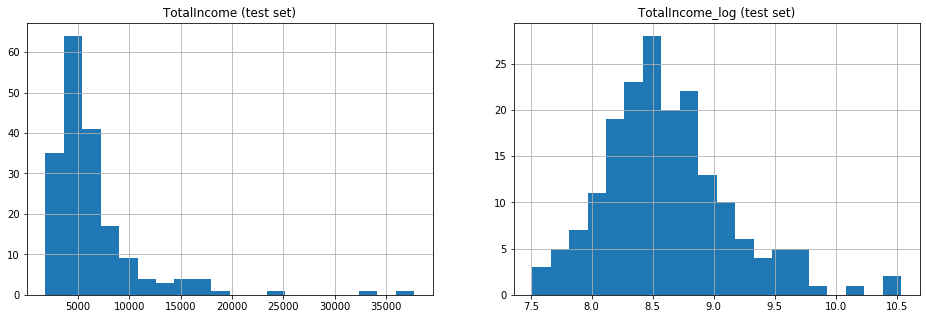

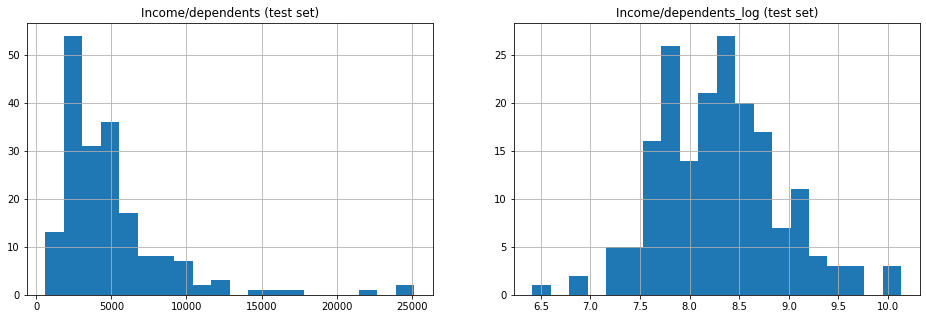

In [696]:
#Test set

#Loan Amount
X_test['LoanAmount_log'] = np.log(X_test['LoanAmount'])
plt.subplot(121)
X_test['LoanAmount'].hist(bins = 20)
plt.title('LoanAmount (test set)')
plt.subplot(122)
X_test['LoanAmount_log'].hist(bins = 20, figsize = (16, 5))
plt.title('LoanAmount_log (test set)')
plt.show()

#Total Income
X_test['TotalIncome_log'] = np.log(X_test['TotalIncome'])
plt.subplot(121)
X_test['TotalIncome'].hist(bins = 20)
plt.title('TotalIncome (test set)')
plt.subplot(122)
X_test['TotalIncome_log'].hist(bins = 20, figsize = (16, 5))
plt.title('TotalIncome_log (test set)')
plt.show()

#Income/dependents
X_test['Income/dependents_log'] = np.log(X_test['Income/dependents'])
plt.subplot(121)
X_test['Income/dependents'].hist(bins = 20)
plt.title('Income/dependents (test set)')
plt.subplot(122)
X_test['Income/dependents_log'].hist(bins = 20, figsize = (16, 5))
plt.title('Income/dependents_log (test set)')
plt.show()

As the above created graphs show the amount of variance is succesfully reduced.

## Encoding categorical variables

The next step of the preprocessing phase will be one-hot encoding of categorical variables.

In [697]:
#Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1, 3, 4, 10])], remainder = 'passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

print('X_train:\n', X_train[:2, :])
print('X_test:\n', X_test[:2, :])


X_train:
 [[0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  3.62000000e+03 0.00000000e+00 2.50000000e+01 1.20000000e+02
  1.00000000e+00 3.62000000e+03 3.62000000e+03 3.21887582e+00
  8.19422930e+00 8.19422930e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  3.57200000e+03 4.11400000e+03 1.52000000e+02 3.60000000e+02
  0.00000000e+00 7.68600000e+03 7.68600000e+03 5.02388052e+00
  8.94715577e+00 8.94715577e+00]]
X_test:
 [[1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  4.16000000e+03 0.00000000e+00 7.10000000e+01 3.60000000e+02
  1.00000000e+00 4.16000000e+03 4.16000000e+03

Our categorical vaiables are succesfully encoded.

## Feature scaling

The very last step before model building is feature scaling, which is a necessary step for algorithms like: Logistic Regression, K-Nearest Neighbors or Support Vector Machines.

In [698]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 11:] = sc.fit_transform(X_train[:, 11:])
X_test[:, 11:] = sc.transform(X_test[:, 11:])
print('X_train:\n', X_train[:2, :])
print('X_test:\n', X_test[:2, :])

X_train:
 [[ 0.          1.          1.          0.          0.          1.
   1.          0.          0.          1.          0.         -0.65679636
  -0.28073548 -0.53294911 -1.44067701 -3.67049153  0.42640143 -0.51348154
  -0.39780603 -3.45751006 -0.90118817 -0.38915728]
 [ 0.          1.          0.          1.          0.          1.
   1.          0.          1.          0.          0.         -0.65679636
  -0.28798497  0.70694086  0.04817742  0.25042696 -2.34520788  0.06212834
   0.39098802  0.30805543  0.46623443  0.84551957]]
X_test:
 [[ 1.          0.          1.          0.          1.          0.
   1.          0.          0.          1.          0.         -0.65679636
  -0.19917869 -0.53294911 -0.9014069   0.25042696  0.42640143 -0.43703557
  -0.29304735 -1.27994647 -0.64866965 -0.16115259]
 [ 0.          1.          0.          1.          1.          0.
   1.          0.          0.          1.          0.          1.07182719
  -0.33269018 -0.3870797  -0.15111806  0.2504

As we can see the data is perfectly scaled.

## Training, evaluating and improving the models 

Finally the dataset is ready to use it for training ML algorithms. 

### Training and evaluating the models

I will start with writting a function, that will enable us to:
1. Fit the model on the train set
2. Classify customers based on the test set
3. Make a confusion matrix in order to compare the prediciton of the model to true values of the dependent variable
4. Calculate sensitivity, specificity and precision - important evaluation metrics when it comes to classification problems
5. Calculate the AUC metric
6. Perform k-fold cross validation in order to see what is the mean accuracy (as it is the metric used to evaluate the models performance on the [hackathon](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)) and its standard deviation

Later on I will train the models and pick the best one in order to perform grid search.

In [699]:
#Importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#Creating a function for estimating models and evaluating the outcomes
def classifier(method):
    
    #Fitting the model
    model = method.fit(X_train, y_train)
    print(method, '\n')
    
    #Predicting the test set results
    y_pred = model.predict(X_test)
    print('Correct predictions: {}\nIncorrect predictions: {}\n'.format(sum(y_pred == y_test), 
          sum(y_pred != y_test)))
    
    #Making a confusion matrix
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix: \n{}'.format(cm),
          '\n')
    print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)),
          '\n')
    
    #Calculating sensitivity, specificity and precision
    spec = cm[0,0]/(cm[0,0]+cm[0,1])
    sens = cm[1,1]/(cm[1,0]+cm[1,1])
    prec = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Sensitivity: {:.2f} \nSpecificity: {:.2f} \nPrecision: {:.2f}'.format(sens, spec, prec))
    
    #Calculating AUC
    from sklearn.metrics import roc_auc_score
    print('AUC score: {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))
    
    #Performing k-fold cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(model, X_train, y_train, cv = 10)
    print('Accuracy (10-fold cross validation): {:.2f}'.format(accuracies.mean()*100))
    print('Standard deviation accuracy (10-fold cross validation): {:.2f}\n'.format(accuracies.std()*100))
    

#Training models and evaluating the results
classifier(LogisticRegression(max_iter = 200))
classifier(KNeighborsClassifier())
classifier(SVC()) #rbf kernel
classifier(SVC(kernel = 'sigmoid'))
classifier(SVC(kernel = 'poly'))
classifier(GaussianNB())
classifier(DecisionTreeClassifier(criterion = 'entropy'))
classifier(RandomForestClassifier(criterion = 'entropy')) 
classifier(XGBClassifier(scale_pos_weight = 100))
classifier(CatBoostClassifier(logging_level = 'Silent'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

Correct predictions: 148
Incorrect predictions: 37

Confusion Matrix: 
[[ 23  37]
 [  0 125]] 

Accuracy score: 0.8000 

Sensitivity: 1.00 
Specificity: 0.38 
Precision: 0.77
AUC score: 0.6917

Accuracy (10-fold cross validation): 81.12
Standard deviation accuracy (10-fold cross validation): 3.52

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

Correct predictions: 144
Incorrect predictions: 41

Confusion Matrix: 
[[ 26  34]
 [  7 118]] 

Accuracy score: 0.7784 

Sensitivity: 0.94 
Specificity: 0.43 
Precision: 0.78
AUC score

Based alone on the Accuracy score and its standard deviation the best classification model seems to be the SVC with a rbf kernel (with 81.35 mean accuracy and 2.55 its standard deviation). Knowing that let's move on to tuning hyperparameters using the grid search method, although to be completely sure we will try different kernels. 

### Model improvement with grid search

In [700]:
from sklearn.model_selection import GridSearchCV

#Setting different parameter ranges or types
params = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly', 'rbf', 'sigmoid'], 
              'gamma': ['scale', 'auto'], 'class_weight': [None, 'balanced']}]

#Creating an instance of GridSearchCV class
grid_search = GridSearchCV(estimator = SVC(), 
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10)

#Performing grid search and printing the best accuracy&parameters
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.82 %
Best Parameters: {'C': 0.75, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly'}


As we can see using grid search on the SVC method we did beat the *rbf* with the *poly* kernel.

Let us perform the classification using those best parameters in order to see what level of standard deviation we will get.

In [703]:
model = SVC(C = 0.75, class_weight = 'balanced', gamma = 'scale', kernel = 'poly')
classifier(model)

SVC(C=0.75, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 

Correct predictions: 148
Incorrect predictions: 37

Confusion Matrix: 
[[ 27  33]
 [  4 121]] 

Accuracy score: 0.8000 

Sensitivity: 0.97 
Specificity: 0.45 
Precision: 0.79
AUC score: 0.7090

Accuracy (10-fold cross validation): 81.82
Standard deviation accuracy (10-fold cross validation): 2.52



The final model gives us the accuracy of 81.82% with a standard deviation of 2.52.

## Summary

### The best model

As it seems the best classification model (among those tested) which helps us to label the customers as either *eligible* or *not-eligible* is the Support Vector Machine with a polynomial kernel. This result is of course not the best that can be achieved, as there are few things that might have been done - such as:

1. Creating a neural network
2. Using different kind of missing value imputation (e.g. K-Nearest Neighbors)
3. Discover some patterns between independent variables which could give us some ideas for creating new variables at the feature engineering stage.
4. Try different kinds of ensemble modeling

Nevertheless this was a great first step in my data science journey which enabled me to use and deepen my knowledge.